In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [9]:
customers=pd.read_csv('Ecommerce Customers')

In [11]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [13]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [14]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


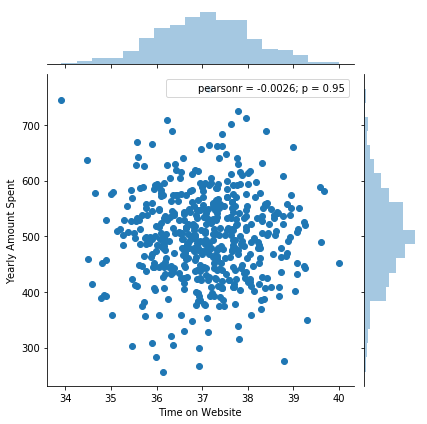

In [19]:
sns.jointplot(data=customers,x='Time on Website',y='Yearly Amount Spent')

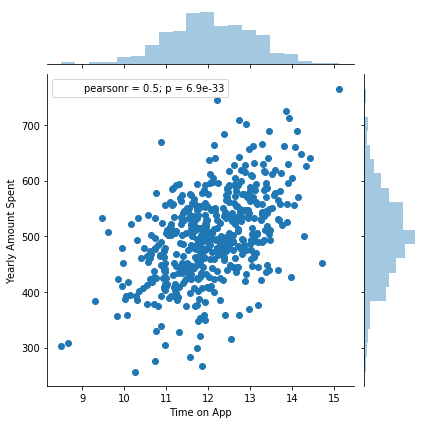

In [21]:
sns.jointplot(data=customers,x='Time on App',y='Yearly Amount Spent')

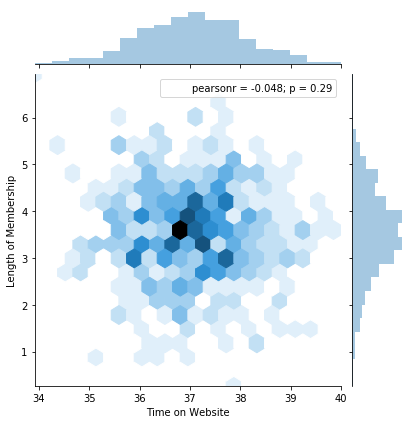

In [25]:
sns.jointplot(data=customers,x='Time on Website',y='Length of Membership',kind='hex')

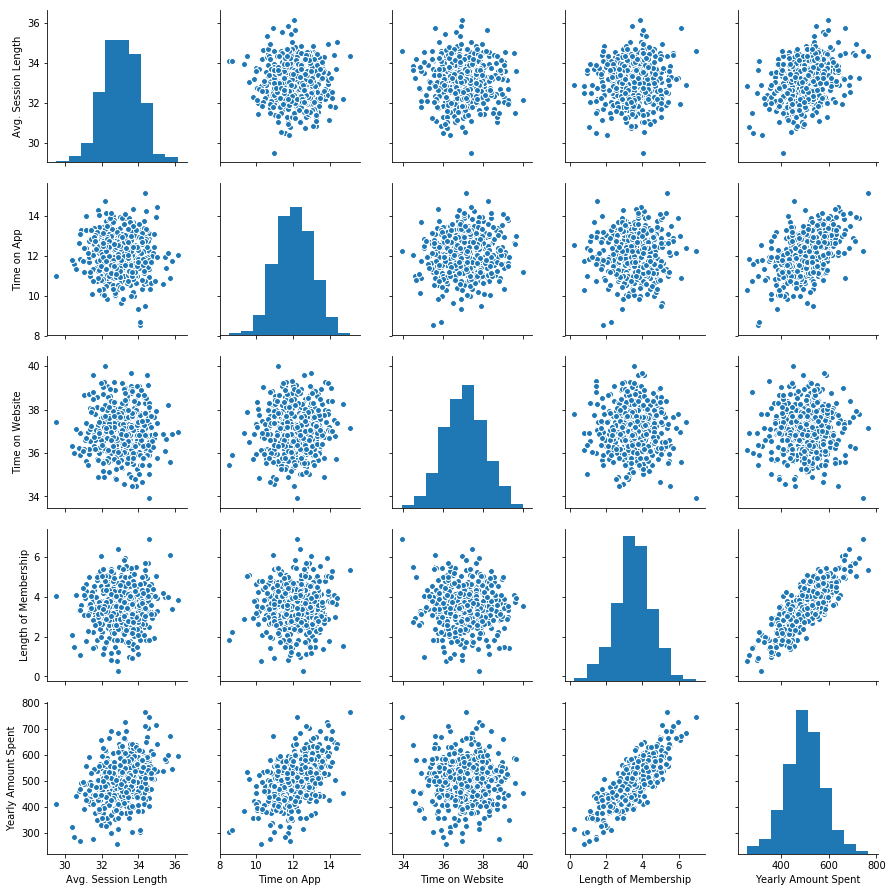

In [26]:
sns.pairplot(customers)

In [285]:
#Length of Membership

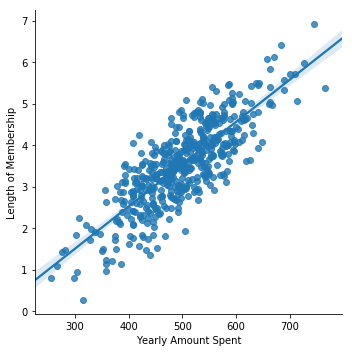

In [28]:
sns.lmplot(data=customers,x='Yearly Amount Spent',y='Length of Membership')

In [33]:
X=customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']]

In [34]:
y=customers['Yearly Amount Spent']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lm=LinearRegression()

In [41]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
lm.coef_

array([  2.34540439e-14,   1.53210777e-14,  -1.04105093e-15,
         4.63804342e-14,   1.00000000e+00])

In [50]:
predict=lm.predict(X_test)

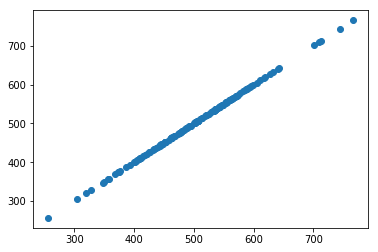

In [51]:
plt.scatter(x=y_test,y=predict)


## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [58]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

metrics.explained_variance_score(y_test, predict)



MAE: 6.8212102633e-14
MSE: 8.3148884491e-27
RMSE: 9.11860101611e-14


1.0

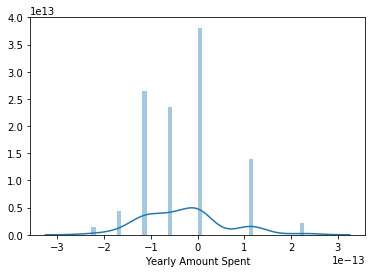

In [56]:
sns.distplot((y_test-predict),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [60]:
cdf= pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf


,Coeff
Avg. Session Length,2.345404e-14
Time on App,1.532108e-14
Time on Website,-1.041051e-15
Length of Membership,4.638043e-14
Yearly Amount Spent,1.000000e+00
